## Sinal giroscópio triaxial


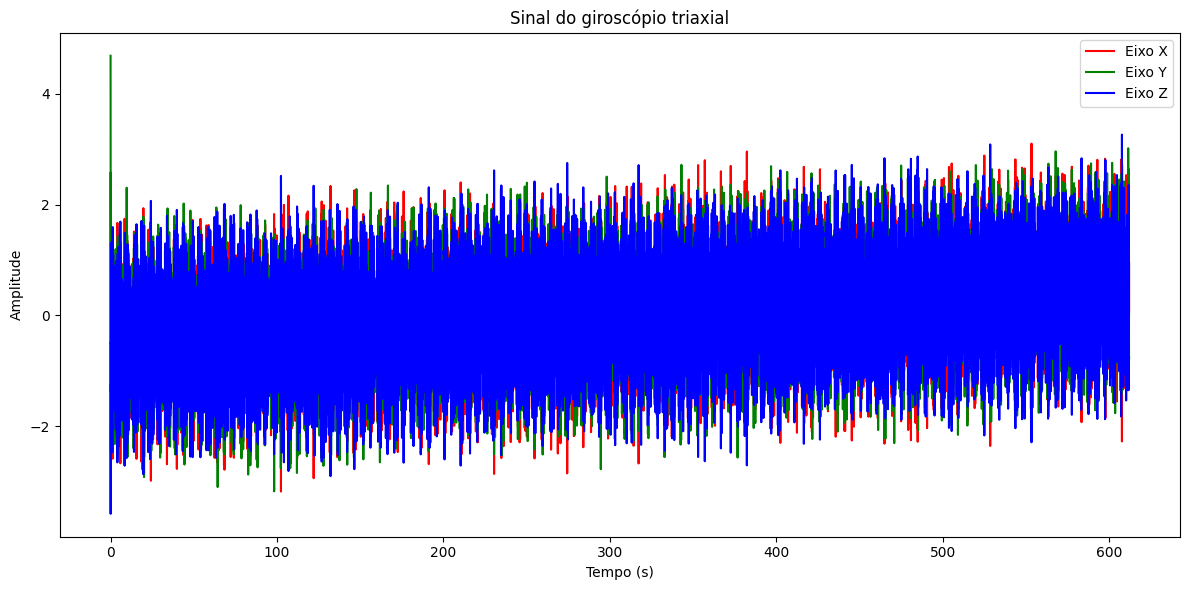

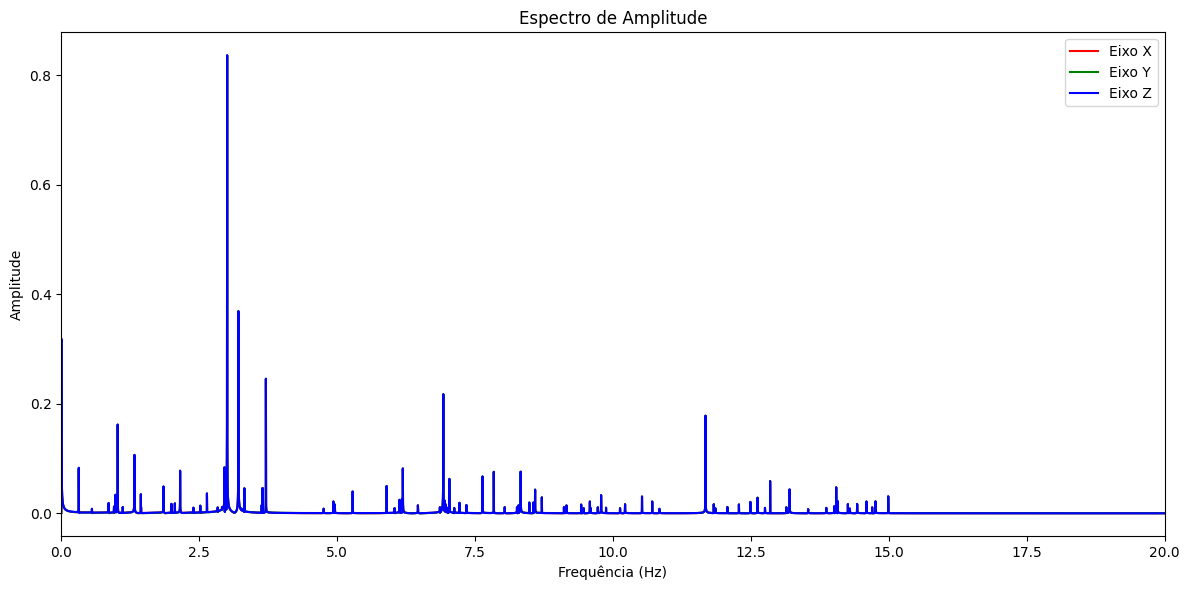

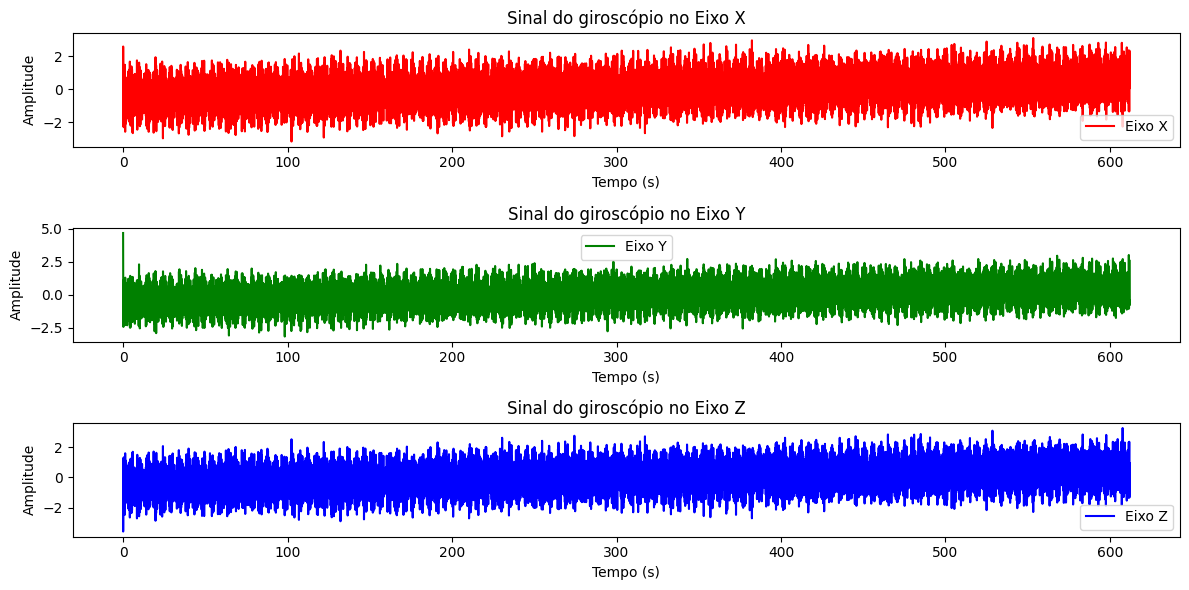

In [2]:
import numpy as np
import scipy.fftpack
import matplotlib.pyplot as plt

# simulation parameters
srate = 50  # in Hz
npnts = srate * 612  # 612 seconds
time = np.arange(0, npnts) / srate

# Generate 100 random frequencies in the range 0.1 to 10 Hz
num_freqs = 100
frex = np.random.uniform(0.1, 15, num_freqs)

# Criação de tendência linear para simular drift
trend = np.linspace(-0.5, 0.5, len(time))

signal_x = np.zeros(len(time))
signal_y = np.zeros(len(time))
signal_z = np.zeros(len(time))

# loop over frequencies to create signal
for fi in range(0, len(frex)):
    signal_x = signal_x + (1 / (fi + 1)) * np.sin(2 * np.pi * frex[fi] * time)
    signal_y = signal_y + (1 / (fi + 1)) * np.sin(2 * np.pi * frex[fi] * time + np.pi/2)  # Fase de 90 graus para eixo y
    signal_z = signal_z + (1 / (fi + 1)) * np.sin(2 * np.pi * frex[fi] * time + np.pi)  # Fase de 180 graus para eixo z

# Adicionando tendência aos sinais
signal_x = signal_x + trend
signal_y = signal_y + trend
signal_z = signal_z + trend

# amplitude spectrum via Fourier transform
signalX_x = scipy.fftpack.fft(signal_x)
signalX_y = scipy.fftpack.fft(signal_y)
signalX_z = scipy.fftpack.fft(signal_z)

signalAmp_x = 2 * np.abs(signalX_x) / npnts
signalAmp_y = 2 * np.abs(signalX_y) / npnts
signalAmp_z = 2 * np.abs(signalX_z) / npnts

# vector of frequencies in Hz
hz = np.linspace(0, srate / 2, int(np.floor(npnts / 2) + 1))

# Plotar os sinais no domínio do tempo
plt.figure(figsize=(12, 6))
plt.plot(time, signal_x, label='Eixo X', color='r')
plt.plot(time, signal_y, label='Eixo Y', color='g')
plt.plot(time, signal_z, label='Eixo Z', color='b')
plt.title('Sinal do giroscópio triaxial')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

# Plotar os espectros de amplitude
plt.figure(figsize=(12, 6))
plt.plot(hz, signalAmp_x[:len(hz)], label='Eixo X', color='r')
plt.plot(hz, signalAmp_y[:len(hz)], label='Eixo Y', color='g')
plt.plot(hz, signalAmp_z[:len(hz)], label='Eixo Z', color='b')
plt.title('Espectro de Amplitude')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 20)
plt.legend()
plt.tight_layout()
plt.show()

# Plotar os sinais individuais no domínio do tempo
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(time, signal_x, label='Eixo X', color='r')
plt.title('Sinal do giroscópio no Eixo X')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time, signal_y, label='Eixo Y', color='g')
plt.title('Sinal do giroscópio no Eixo Y')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time, signal_z, label='Eixo Z', color='b')
plt.title('Sinal do giroscópio no Eixo Z')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


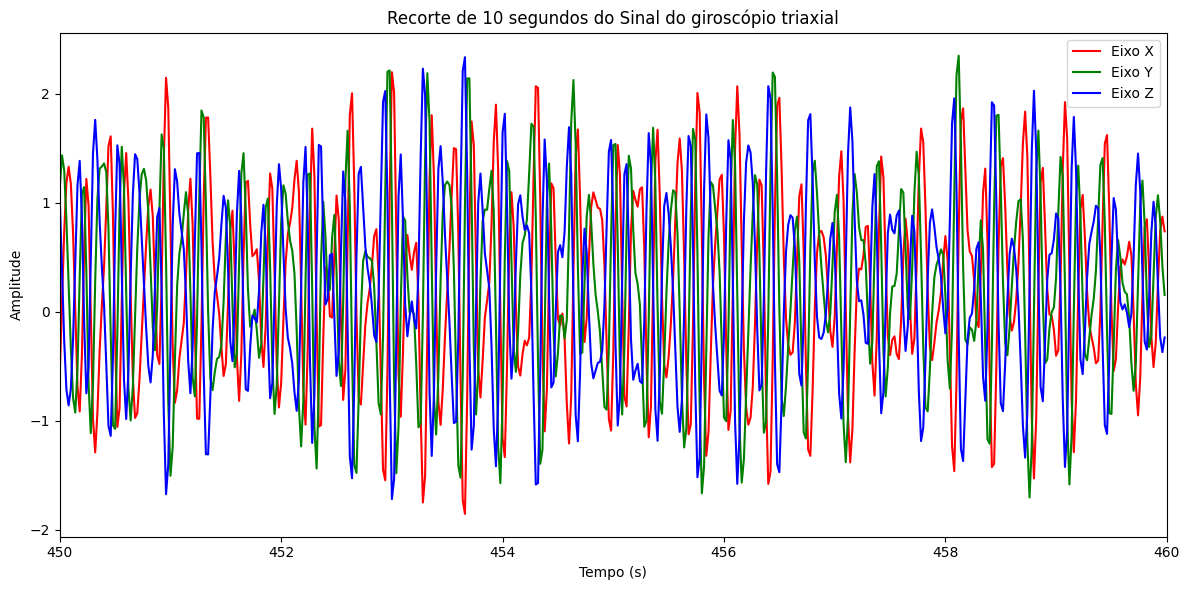

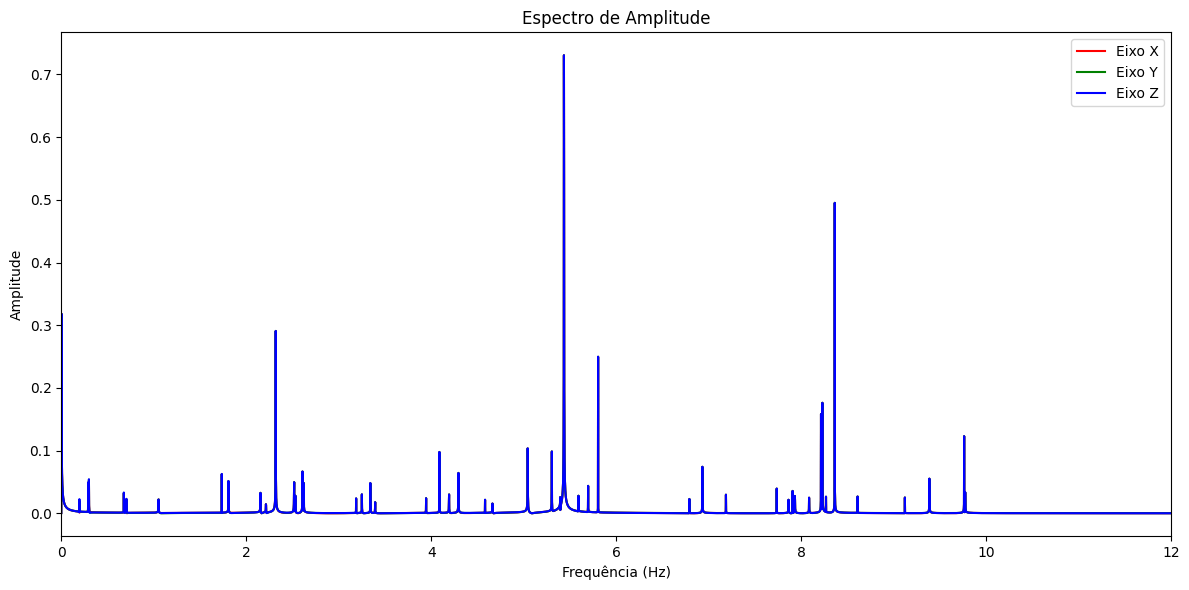

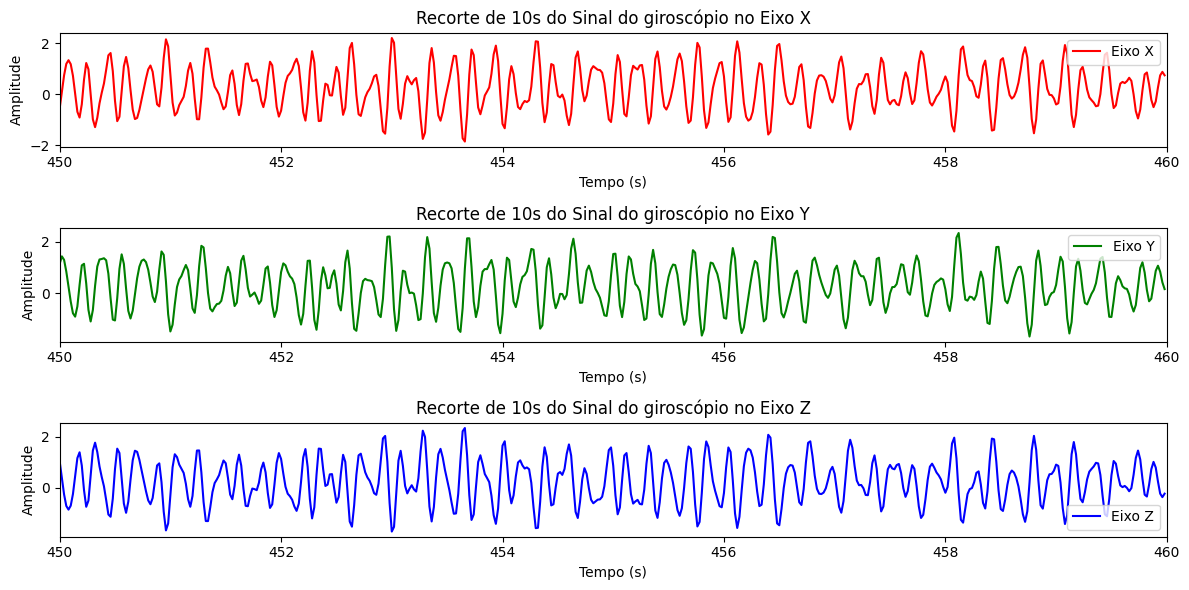

In [4]:
import numpy as np
import scipy.fftpack
import matplotlib.pyplot as plt

# simulation parameters
srate = 50  # in Hz
npnts = srate * 612  # 612 seconds
time = np.arange(0, npnts) / srate

# Generate 30 random frequencies in the range 0.1 to 10 Hz
num_freqs = 50
frex = np.random.uniform(0.1, 10, num_freqs)

# Criação de tendência linear para simular drift
trend = np.linspace(-0.5, 0.5, len(time))

signal_x = np.zeros(len(time))
signal_y = np.zeros(len(time))
signal_z = np.zeros(len(time))

# loop over frequencies to create signal
for fi in range(0, len(frex)):
    signal_x = signal_x + (1 / (fi + 1)) * np.sin(2 * np.pi * frex[fi] * time)
    signal_y = signal_y + (1 / (fi + 1)) * np.sin(2 * np.pi * frex[fi] * time + np.pi/2)  # Fase de 90 graus para eixo y
    signal_z = signal_z + (1 / (fi + 1)) * np.sin(2 * np.pi * frex[fi] * time + np.pi)  # Fase de 180 graus para eixo z

# Adicionando tendência aos sinais
signal_x = signal_x + trend
signal_y = signal_y + trend
signal_z = signal_z + trend

# amplitude spectrum via Fourier transform
signalX_x = scipy.fftpack.fft(signal_x)
signalX_y = scipy.fftpack.fft(signal_y)
signalX_z = scipy.fftpack.fft(signal_z)

signalAmp_x = 2 * np.abs(signalX_x) / npnts
signalAmp_y = 2 * np.abs(signalX_y) / npnts
signalAmp_z = 2 * np.abs(signalX_z) / npnts

# vector of frequencies in Hz
hz = np.linspace(0, srate / 2, int(np.floor(npnts / 2) + 1))

# Recorte de 10 segundos do sinal
start_index = 450 * srate
end_index = 460 * srate

time_cut = time[start_index:end_index]
signal_x_cut = signal_x[start_index:end_index]
signal_y_cut = signal_y[start_index:end_index]
signal_z_cut = signal_z[start_index:end_index]

# Plotar os sinais no domínio do tempo
plt.figure(figsize=(12, 6))
plt.plot(time_cut, signal_x_cut, label='Eixo X', color='r')
plt.plot(time_cut, signal_y_cut, label='Eixo Y', color='g')
plt.plot(time_cut, signal_z_cut, label='Eixo Z', color='b')
plt.title('Recorte de 10 segundos do Sinal do giroscópio triaxial')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.xlim(450, 460)
plt.legend()
plt.tight_layout()
plt.show()

# Plotar os espectros de amplitude
plt.figure(figsize=(12, 6))
plt.plot(hz, signalAmp_x[:len(hz)], label='Eixo X', color='r')
plt.plot(hz, signalAmp_y[:len(hz)], label='Eixo Y', color='g')
plt.plot(hz, signalAmp_z[:len(hz)], label='Eixo Z', color='b')
plt.title('Espectro de Amplitude')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 12)
plt.legend()
plt.tight_layout()
plt.show()

# Plotar os sinais individuais no domínio do tempo
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(time_cut, signal_x_cut, label='Eixo X', color='r')
plt.title('Recorte de 10s do Sinal do giroscópio no Eixo X')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.xlim(450, 460)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time_cut, signal_y_cut, label='Eixo Y', color='g')
plt.title('Recorte de 10s do Sinal do giroscópio no Eixo Y')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.xlim(450, 460)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time_cut, signal_z_cut, label='Eixo Z', color='b')
plt.title('Recorte de 10s do Sinal do giroscópio no Eixo Z')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.xlim(450, 460)
plt.legend()

plt.tight_layout()
plt.show()


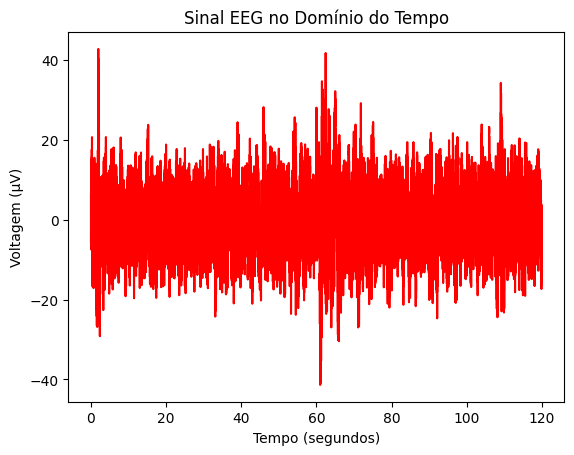

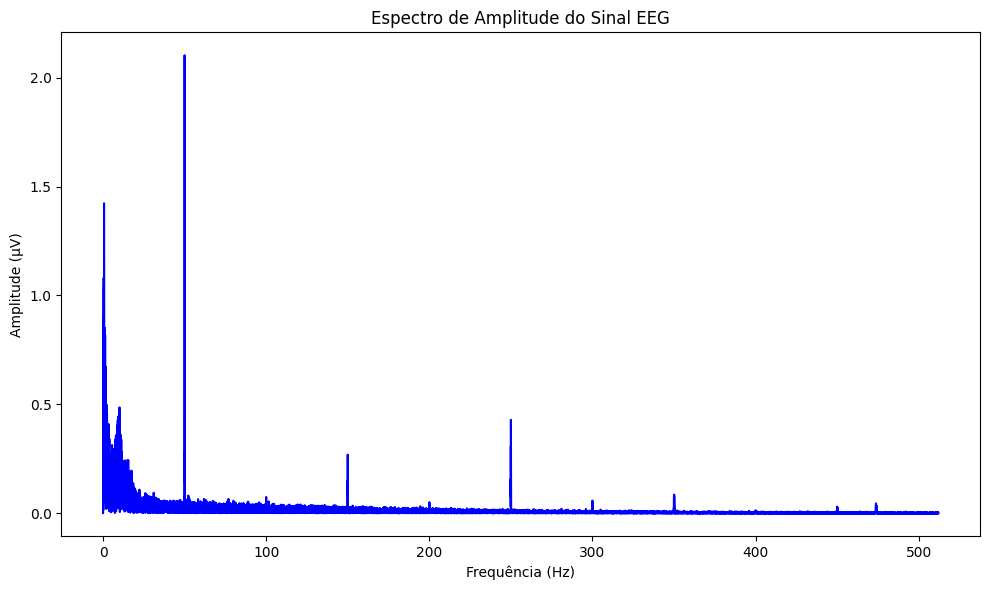

In [1]:
import numpy as np
import scipy.io as sio
import scipy.fftpack
import matplotlib.pyplot as plt

# Carregar os dados do arquivo .mat
matdat = sio.loadmat('EEGrestingState.mat')
eegdata = matdat['eegdata'][0]
srate = matdat['srate'][0][0]

# Vetor de tempo
N = len(eegdata)
timevec = np.arange(0, N) / srate

# Plotar os dados
plt.plot(timevec, eegdata, 'r')  # Alteração da cor para vermelho
plt.xlabel('Tempo (segundos)')
plt.ylabel('Voltagem (µV)')
plt.title('Sinal EEG no Domínio do Tempo')
plt.show()

# Calcular a transformada de Fourier do sinal
signalX = scipy.fftpack.fft(eegdata)
signalAmp = 2 * np.abs(signalX) / N

# Vetor de frequências em Hz
hz = np.linspace(0, srate / 2, int(np.floor(N / 2) + 1))

# Plotar o espectro de amplitude
plt.figure(figsize=(10, 6))
plt.plot(hz, signalAmp[:len(hz)], 'b')  # Alteração da cor para azul
plt.title('Espectro de Amplitude do Sinal EEG')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude (µV)')
plt.tight_layout()
plt.show()


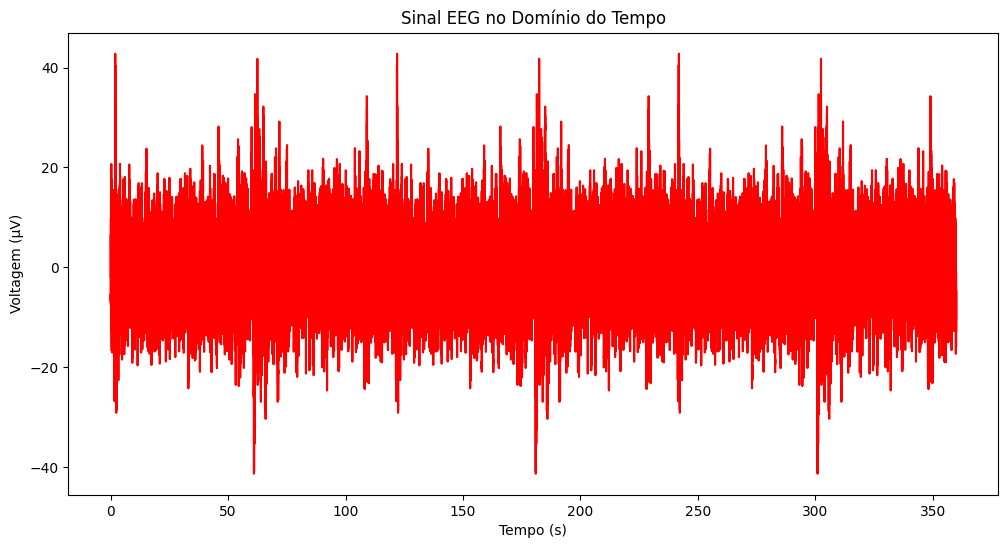

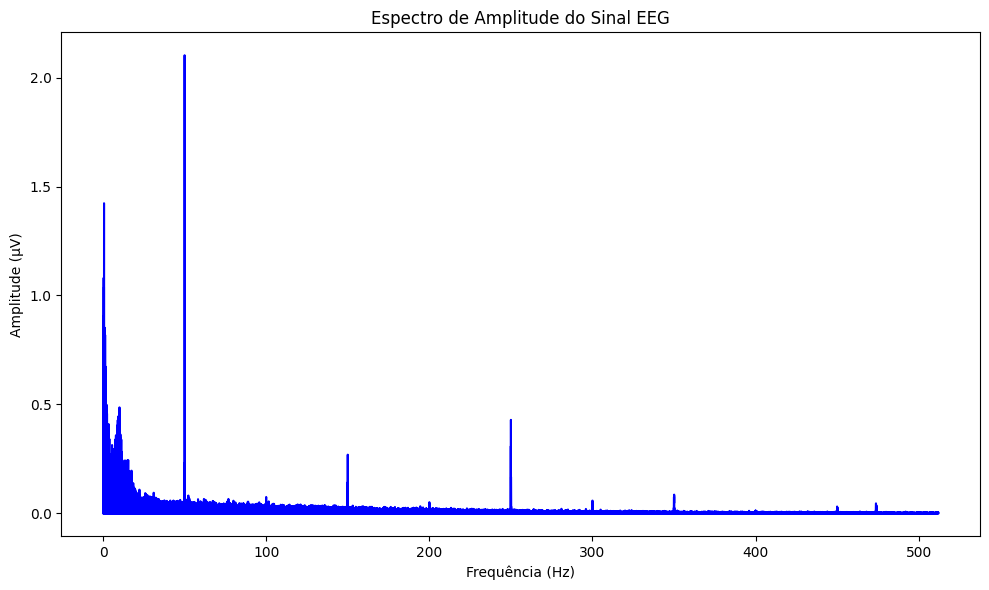

In [7]:
import numpy as np
import scipy.io as sio
import scipy.fftpack
import matplotlib.pyplot as plt

# Carregar os dados do arquivo .mat
matdat = sio.loadmat('EEGrestingState.mat')
eegdata = matdat['eegdata'][0]
srate = matdat['srate'][0][0]

# Triplicar os dados
eegdata_triplicado = np.concatenate([eegdata, eegdata, eegdata])
srate_triplicado = srate

# Salvar os dados triplicados em um novo arquivo .mat
matdat_triplicado = {'eegdata': eegdata_triplicado, 'srate': srate_triplicado}
sio.savemat('EEGrestingState_triplicado.mat', matdat_triplicado)

# Vetor de tempo para os dados triplicados
N = len(eegdata_triplicado)
timevec_triplicado = np.arange(0, N) / srate_triplicado

# Plotar os dados triplicados
plt.figure(figsize=(12, 6))
plt.plot(timevec_triplicado, eegdata_triplicado, 'r')  # Alteração da cor para vermelho
plt.xlabel('Tempo (s)')
plt.ylabel('Voltagem (µV)')
plt.title('Sinal EEG no Domínio do Tempo')
plt.show()

# Calcular a transformada de Fourier dos dados triplicados
signalX_triplicado = scipy.fftpack.fft(eegdata_triplicado)
signalAmp_triplicado = 2 * np.abs(signalX_triplicado) / N

# Vetor de frequências em Hz para os dados triplicados
hz_triplicado = np.linspace(0, srate_triplicado / 2, int(np.floor(N / 2) + 1))

# Plotar o espectro de amplitude dos dados triplicados
plt.figure(figsize=(10, 6))
plt.plot(hz_triplicado, signalAmp_triplicado[:len(hz_triplicado)], 'b')  # Alteração da cor para azul
plt.title('Espectro de Amplitude do Sinal EEG')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude (µV)')
plt.tight_layout()
plt.show()


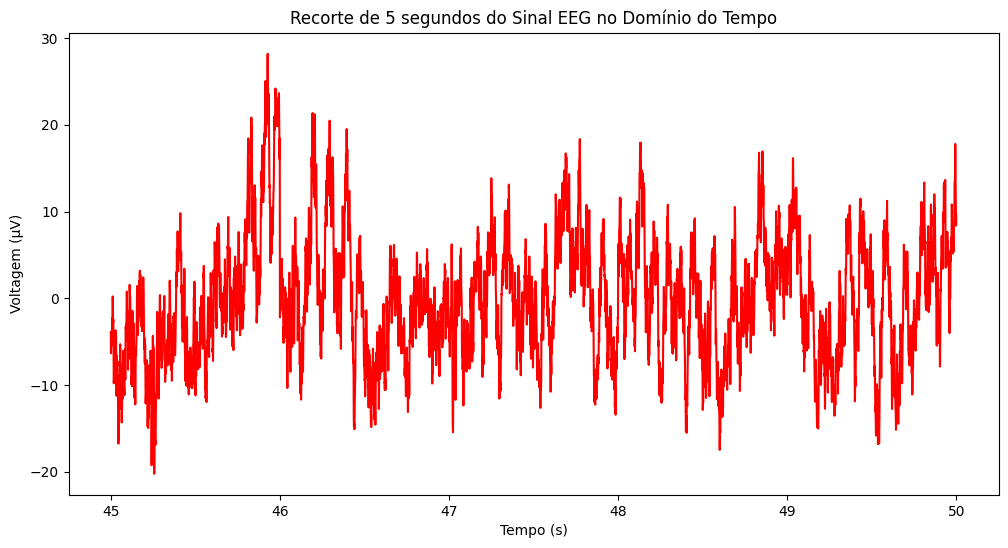

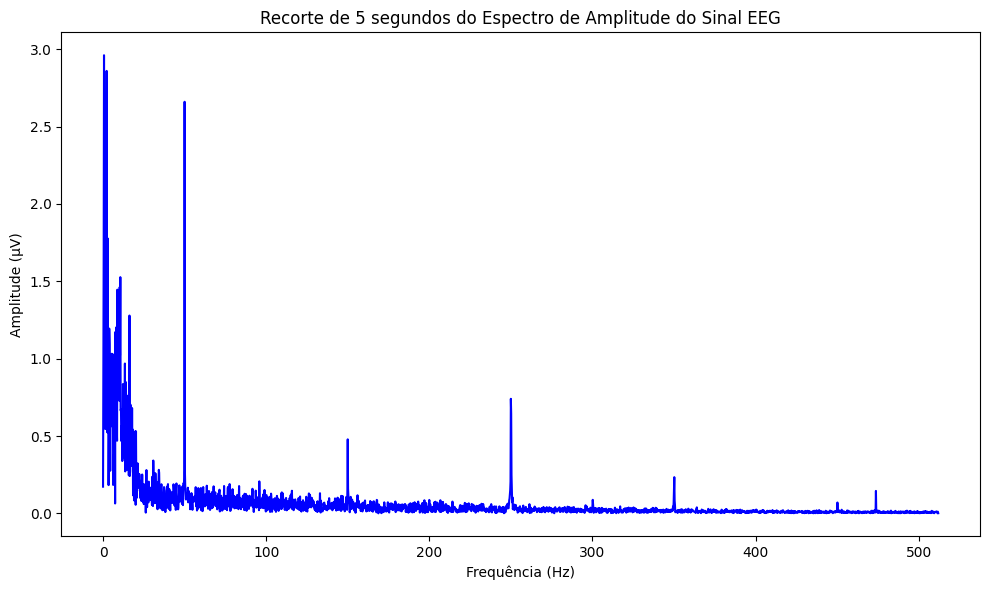

In [8]:
import numpy as np
import scipy.io as sio
import scipy.fftpack
import matplotlib.pyplot as plt

# Carregar os dados do arquivo .mat
matdat = sio.loadmat('EEGrestingState.mat')
eegdata = matdat['eegdata'][0]
srate = matdat['srate'][0][0]

# Triplicar os dados
eegdata_triplicado = np.concatenate([eegdata, eegdata, eegdata])
srate_triplicado = srate

# Salvar os dados triplicados em um novo arquivo .mat
matdat_triplicado = {'eegdata': eegdata_triplicado, 'srate': srate_triplicado}
sio.savemat('EEGrestingState_triplicado.mat', matdat_triplicado)

# Vetor de tempo para os dados triplicados
N = len(eegdata_triplicado)
timevec_triplicado = np.arange(0, N) / srate_triplicado

# Encontrar o índice correspondente a 45 segundos e 50 segundos
indice_45segundos = int(45 * srate_triplicado)
indice_50segundos = int(50 * srate_triplicado)

# Recortar os dados no domínio do tempo
eegdata_recortado_tempo = eegdata_triplicado[indice_45segundos:indice_50segundos]
timevec_recortado = timevec_triplicado[indice_45segundos:indice_50segundos]

# Plotar o recorte dos dados no domínio do tempo
plt.figure(figsize=(12, 6))
plt.plot(timevec_recortado, eegdata_recortado_tempo, 'r')  
plt.xlabel('Tempo (s)')
plt.ylabel('Voltagem (µV)')
plt.title('Recorte de 5 segundos do Sinal EEG no Domínio do Tempo')
plt.show()

# Calcular a transformada de Fourier dos dados recortados no tempo
signalX_recortado = scipy.fftpack.fft(eegdata_recortado_tempo)
signalAmp_recortado = 2 * np.abs(signalX_recortado) / len(eegdata_recortado_tempo)

# Vetor de frequências em Hz para os dados recortados
N_recortado = len(eegdata_recortado_tempo)
hz_recortado = np.linspace(0, srate_triplicado / 2, int(np.floor(N_recortado / 2) + 1))

# Plotar o recorte dos dados no domínio da frequência
plt.figure(figsize=(10, 6))
plt.plot(hz_recortado, signalAmp_recortado[:len(hz_recortado)], 'b')  
plt.title('Recorte de 5 segundos do Espectro de Amplitude do Sinal EEG')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude (µV)')
plt.tight_layout()
plt.show()


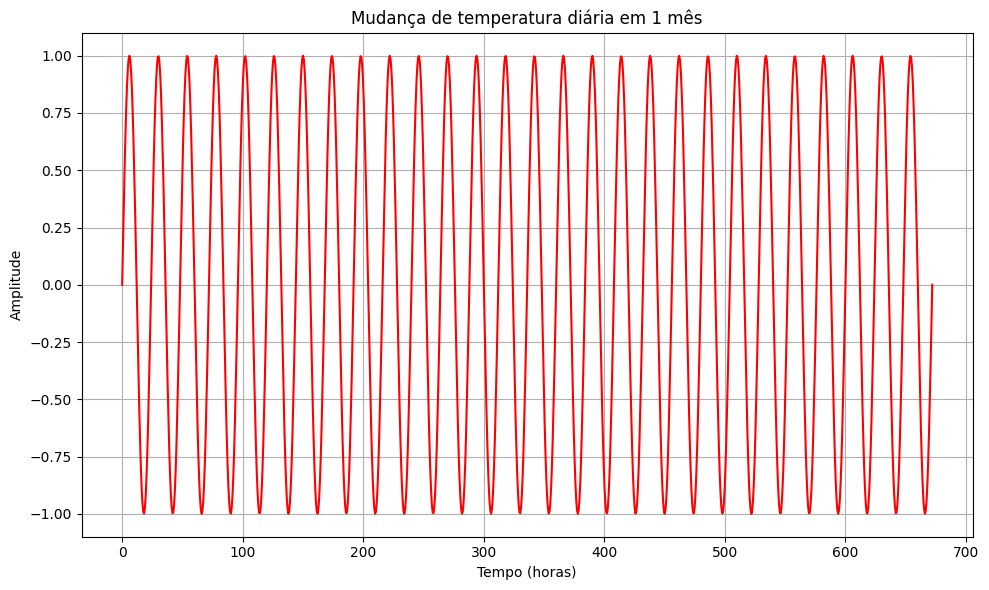

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Frequência senoidal para representar alterações a cada 24 horas com 7 repetições
frequencia = 1 / 24  # Frequência de 1 ciclo a cada 24 horas
periodo = 7 * 4 * 24  # Número total de horas (7 dias)
tempo = np.linspace(0, periodo, num=1000)  # Tempo ao longo de 7 dias
frequencia_seno = np.sin(2 * np.pi * frequencia * tempo)

# Plotagem do gráfico
plt.figure(figsize=(10, 6))
plt.plot(tempo, frequencia_seno, color='red')
plt.xlabel('Tempo (horas)')
plt.ylabel('Amplitude')
plt.title('Mudança de temperatura diária em 1 mês')
plt.grid(True)
plt.tight_layout()
plt.show()


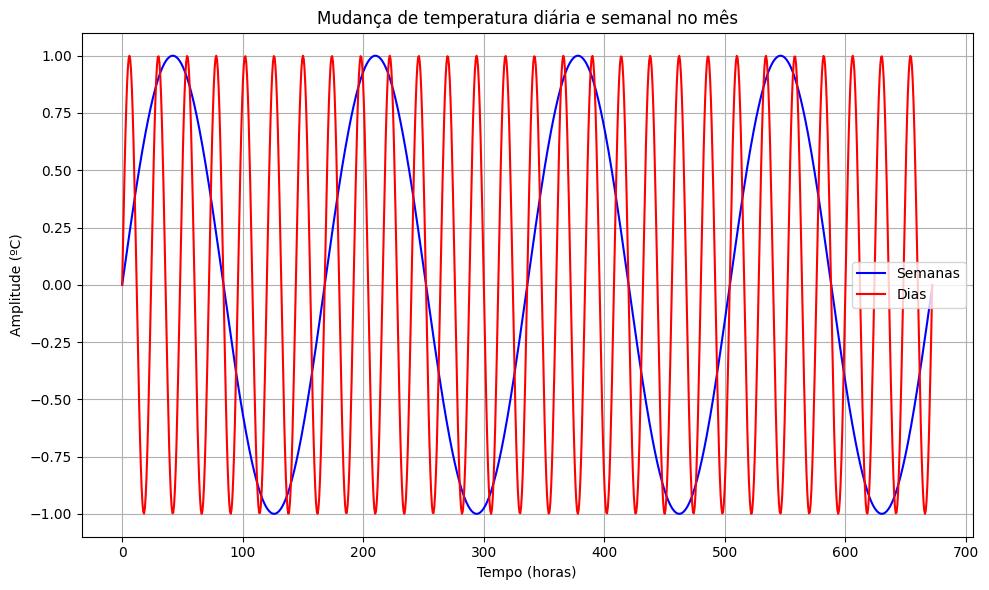

In [108]:
import matplotlib.pyplot as plt
import numpy as np

# Frequência senoidal para representar alterações a cada 24 horas com 7 repetições
frequencia = 1 / 24  # Frequência de 1 ciclo a cada 24 horas
periodo = 7 * 13.71 # Número total de horas (7 dias)
tempo = np.linspace(0, periodo, num=1000)  # Tempo ao longo de 7 dias
frequencia_seno_1 = np.sin(2 * np.pi * frequencia * tempo)

# Frequência senoidal para representar alterações a cada 24 horas com 7 repetições
frequencia = 1 / 24  # Frequência de 1 ciclo a cada 24 horas
periodo = 7 * 4 * 24  # Número total de horas (7 dias)
tempo = np.linspace(0, periodo, num=1000)  # Tempo ao longo de 7 dias
frequencia_seno_2 = np.sin(2 * np.pi * frequencia * tempo)

# Plotagem do gráfico
plt.figure(figsize=(10, 6))
plt.plot(tempo, frequencia_seno_1, color='blue', label='Semanas')
plt.plot(tempo, frequencia_seno_2, color='red', label='Dias')
plt.xlabel('Tempo (horas)')
plt.ylabel('Amplitude (ºC)')
plt.title('Mudança de temperatura diária e semanal no mês')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


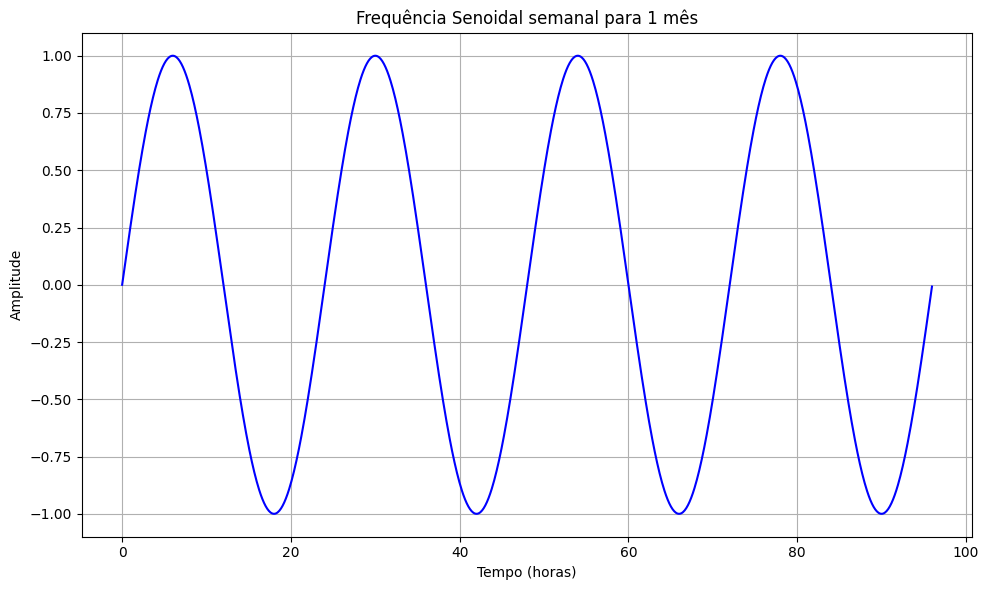

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Frequência senoidal para representar alterações a cada 24 horas com 7 repetições
frequencia = 1 / 24   # Frequência de 1 ciclo a cada 24 horas
periodo =  7 * 13.71 # Número total de horas (7 dias)
tempo = np.linspace(0, periodo, num=1000)  # Tempo ao longo de 7 dias
frequencia_seno = np.sin(2 * np.pi * frequencia * tempo)

# Plotagem do gráfico
plt.figure(figsize=(10, 6))
plt.plot(tempo, frequencia_seno, color='blue')
plt.xlabel('Tempo (horas)')
plt.ylabel('Amplitude')
plt.title('Frequência Senoidal semanal para 1 mês')
plt.grid(True)
plt.tight_layout()
plt.show()


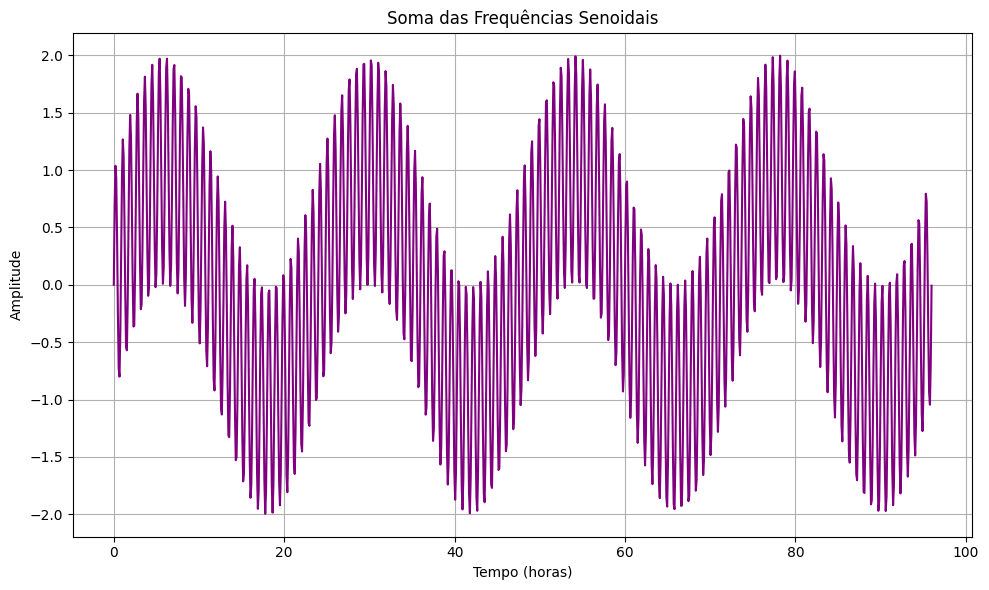

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Frequência senoidal para representar alterações a cada 24 horas com 7 repetições
frequencia_1 = 1 / 24   # Frequência de 1 ciclo a cada 24 horas
periodo_1 = 7 * 13.71 # Número total de horas (7 dias)
tempo_1 = np.linspace(0, periodo_1, num=1000)  # Tempo ao longo de 7 dias
frequencia_seno_1 = np.sin(2 * np.pi * frequencia_1 * tempo_1)

# Frequência senoidal para representar alterações a cada 24 horas com 4 repetições
frequencia_2 = 1 /  24   # Frequência de 1 ciclo a cada 24 horas
periodo_2 =  4 * 672  # Número total de horas (4 ciclos)
tempo_2 = np.linspace(0, periodo_2, num=1000)  # Tempo ao longo de 4 ciclos
frequencia_seno_2 = np.sin(2 * np.pi * frequencia_2 * tempo_2)
# Soma das duas funções seno
soma = frequencia_seno_1 + frequencia_seno_2

# Plotagem do gráfico
plt.figure(figsize=(10, 6))
plt.plot(tempo_1, soma, color='purple')
plt.xlabel('Tempo (horas)')
plt.ylabel('Amplitude')
plt.title('Soma das Frequências Senoidais')
plt.grid(True)
plt.tight_layout()
plt.show()


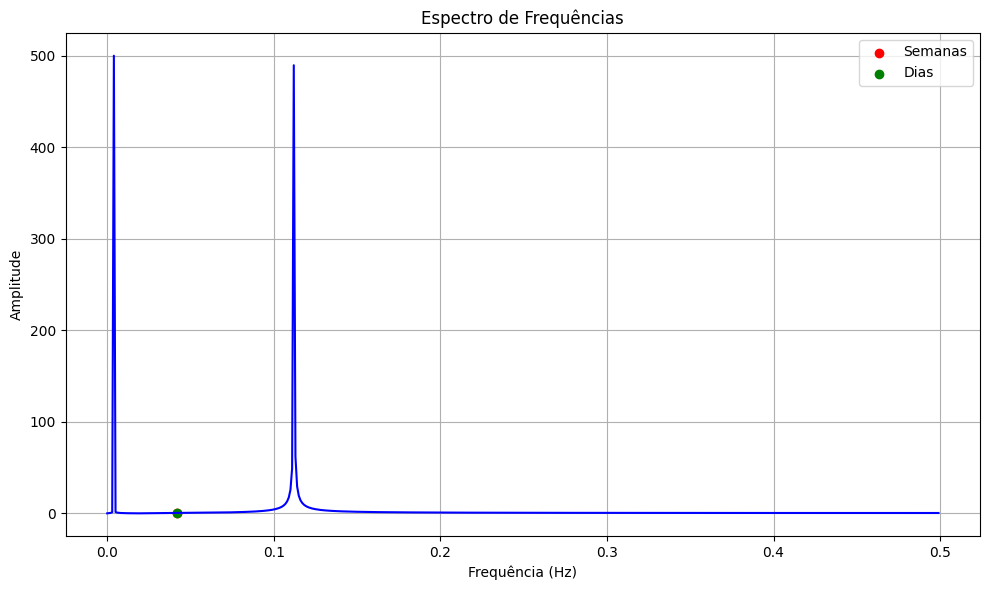

In [105]:
import matplotlib.pyplot as plt
import numpy as np

# Frequência senoidal para representar alterações a cada 24 horas com 7 repetições
frequencia_1 = 1 / 24   # Frequência de 1 ciclo a cada 24 horas
periodo_1 = 7 * 13.71 # Número total de horas (7 dias)
tempo_1 = np.linspace(0, periodo_1, num=1000)  # Tempo ao longo de 7 dias
frequencia_seno_1 = np.sin(2 * np.pi * frequencia_1 * tempo_1)

# Frequência senoidal para representar alterações a cada 24 horas com 4 repetições
frequencia_2 = 1 /  24   # Frequência de 1 ciclo a cada 24 horas
periodo_2 =  4 * 672  # Número total de horas (4 ciclos)
tempo_2 = np.linspace(0, periodo_2, num=1000)  # Tempo ao longo de 4 ciclos
frequencia_seno_2 = np.sin(2 * np.pi * frequencia_2 * tempo_2)

# Soma das duas funções seno
soma = frequencia_seno_1 + frequencia_seno_2

# Transformada de Fourier
fourier = np.fft.fft(soma)
frequencias = np.fft.fftfreq(len(soma))

# Frequências correspondentes
frequencias_positivas = frequencias[:len(frequencias)//2]  # Apenas a parte positiva do espectro

# Encontrando índices correspondentes às duas frequências
indice_frequencia_1 = np.abs(frequencias_positivas - frequencia_1).argmin()
indice_frequencia_2 = np.abs(frequencias_positivas - frequencia_2).argmin()

# Plotagem do espectro de frequências
plt.figure(figsize=(10, 6))
plt.plot(frequencias_positivas, np.abs(fourier[:len(frequencias)//2]), color='blue')
plt.scatter(frequencias_positivas[indice_frequencia_1], np.abs(fourier[indice_frequencia_1]), color='red', label='Semanas')
plt.scatter(frequencias_positivas[indice_frequencia_2], np.abs(fourier[indice_frequencia_2]), color='green', label='Dias')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.title('Espectro de Frequências')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


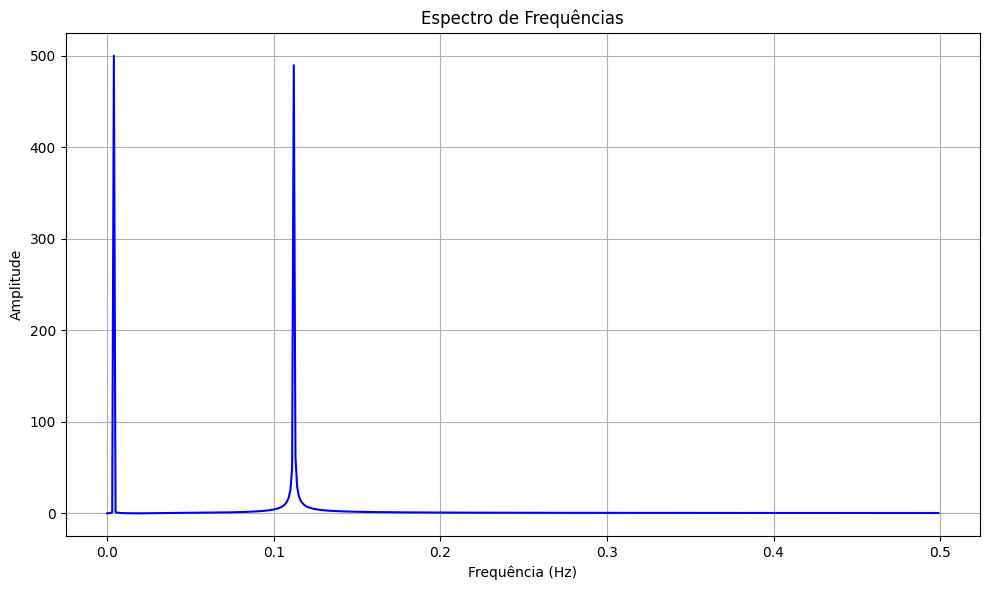

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Frequência senoidal para representar alterações a cada 24 horas com 7 repetições
frequencia_1 = 1 / 24   # Frequência de 1 ciclo a cada 24 horas
periodo_1 = 7 * 13.71 # Número total de horas (7 dias)
tempo_1 = np.linspace(0, periodo_1, num=1000)  # Tempo ao longo de 7 dias
frequencia_seno_1 = np.sin(2 * np.pi * frequencia_1 * tempo_1)

# Frequência senoidal para representar alterações a cada 24 horas com 4 repetições
frequencia_2 = 1 /  24   # Frequência de 1 ciclo a cada 24 horas
periodo_2 =  4 * 672  # Número total de horas (4 ciclos)
tempo_2 = np.linspace(0, periodo_2, num=1000)  # Tempo ao longo de 4 ciclos
frequencia_seno_2 = np.sin(2 * np.pi * frequencia_2 * tempo_2)

# Soma das duas funções seno
soma = frequencia_seno_1 + frequencia_seno_2

# Transformada de Fourier
fourier = np.fft.fft(soma)
frequencias = np.fft.fftfreq(len(soma))

# Frequências correspondentes
frequencias_positivas = frequencias[:len(frequencias)//2]  # Apenas a parte positiva do espectro

# Encontrando índices correspondentes às duas frequências
indice_frequencia_1 = np.abs(frequencias_positivas - frequencia_1).argmin()
indice_frequencia_2 = np.abs(frequencias_positivas - frequencia_2).argmin()

# Plotagem do espectro de frequências
plt.figure(figsize=(10, 6))
plt.plot(frequencias_positivas, np.abs(fourier[:len(frequencias)//2]), color='blue')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.title('Espectro de Frequências')
plt.grid(True)
plt.tight_layout()
plt.show()
